# KNN And Logit Models for Accurate Heart Disease Prediction

Cardiovascular disease is the leading cause of death worldwide, accounting for 31% of all annual deaths. The goal of this analysis is to build a machine learning model to predict heart disease using the Heart Failure Prediction Dataset from Kaggle (https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction).

The models will be based on the KNN and logistic regression classifiers and key clinical features from the dataset. By developing an accurate predictive models, we can enable early detection and management of cardiovascular disease.

The model building process involved exploratory data analysis, data preprocessing, model training and evaluation. Key steps included handling missing values, encoding categorical variables, feature selection, hyperparameter tuning and cross-validation. Accuracy was used to evaluate model performance.

After selecting the features most correlated with the target variable, including sex, chest pain type, maximum heart rate, the slope of the peak exercise ST segment, exercise-induced angina, oldpeak (ST), tuning the hyperparameters and cross-validation, the optimized KNN model with ball-tree algorithm, l2 distance metric, 27 neighbors, and uniform weights achieved the test accuracy of 85%.

The logistic regression model with 10 backward-selected features showed comparable performance, achieving 86% test accuracy.

This level of performance demonstrates the feasibility of using machine learning for heart disease prediction based on standard clinical inputs. The models can serve as a baseline for further refinement and validation on additional datasets. With more work, the models have potential to be a useful tool for early identification of patients at high risk of cardiovascular disease.

In [79]:
# Suppressing Future Warnings messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

Reading in the dataset.

In [80]:
heart = pd.read_csv('heart.csv')
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Checking for missing values.

In [81]:
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Checking the dtypes.

In [82]:
heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

There are both numerical and categorical features in the dataset.

### Exploring Numerical Variables

In [83]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Blood pressure has a minimum value of zero, which is impossible for a living person.

Cholesterol level of zero is physiologically possible but highly unusual, for someone to have zero serum cholesterol, they would need to have very low innate cholesterol production and an extremely low dietary cholesterol intake.

We also note that the target variable is almost evenly distributed, with 55% of patients having heart desease.

### Exploring Categorical Variables

Next we will make some visualizations to understand how the categorical features are distributed.

In [84]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight') # We will use fivethirtyeight style for visualization

%matplotlib inline
# Enables Jupyter to display graphs

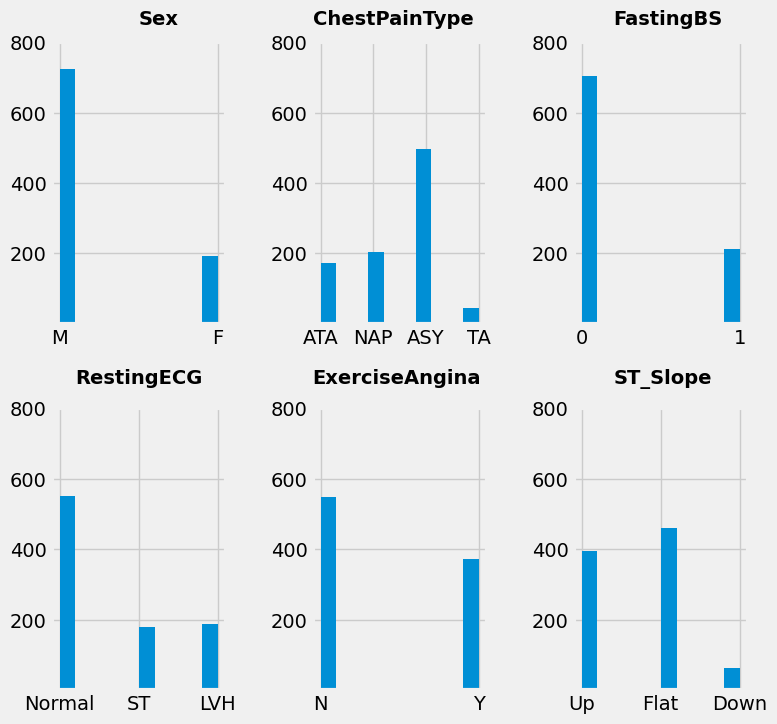

In [85]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(8, 8), alpha=0.1)
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

ax1.hist(heart['Sex'])
ax2.hist(heart['ChestPainType'])
ax3.hist(heart['FastingBS'])
ax4.hist(heart['RestingECG'])
ax5.hist(heart['ExerciseAngina'])
ax6.hist(heart['ST_Slope'])

for ax in axes:
    ax.set_yticks(ticks=[200, 400, 600, 800])

ax1.text(0.5, 850, 'Sex', weight = 'bold')
ax1.text(1.6, 850, 'ChestPainType', weight = 'bold')
ax1.text(3.5, 850, 'FastingBS', weight = 'bold')
ax1.text(0.1, -170, 'RestingECG', weight = 'bold')
ax1.text(1.6, -170, 'ExerciseAngina', weight = 'bold')
ax1.text(3.5, -170, 'ST_Slope', weight = 'bold')

plt.subplots_adjust(wspace=0.5, hspace=0.3)

plt.show()

The distribution is skewed towards:
- males
- patients with asymptomatic chest pain type
- patients with fasting blood sugar less than 120 mg/dl
- patients with normal resting electrocardiogram results
- patients with not exercise-induced angina
- patients with flat and up slopes of the peak exercise ST segment

We will compare the distribution of categorical variables by target variable.

In [86]:
import seaborn as sns

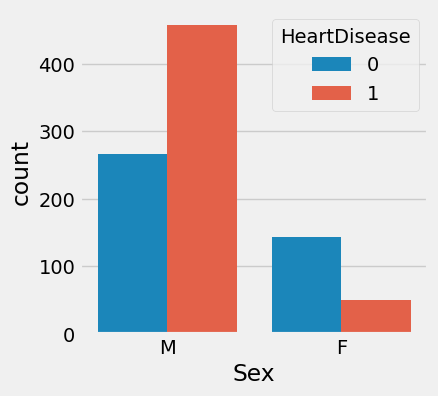

In [87]:
plt.figure(figsize=(4,4))
sns.countplot(x = 'Sex', hue = 'HeartDisease', data = heart)
plt.show()

Males are more likely to have a heart disease than not, while the opposite is true for females.

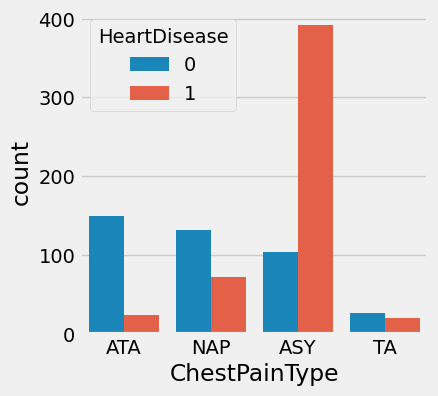

In [88]:
plt.figure(figsize=(4,4))
sns.countplot(x = 'ChestPainType', hue = 'HeartDisease', data = heart)
plt.show()

The hightest count of patients with heart failures come from patients with asymptomatic chest pain, implying that those patients who had heart disease did not have chest pain as a symptom.

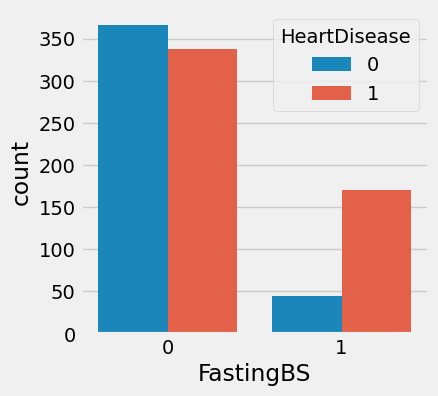

In [89]:
plt.figure(figsize=(4,4))
sns.countplot(x = 'FastingBS', hue = 'HeartDisease', data = heart)
plt.show()

Patients with fasting blood sugar over 120 mg/dl appear to have a high risk of having a heart disease.

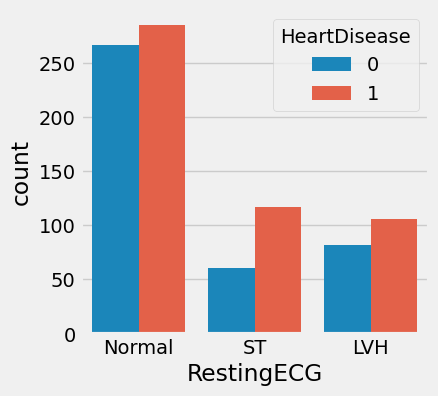

In [90]:
plt.figure(figsize=(4,4))
sns.countplot(x = 'RestingECG', hue = 'HeartDisease', data = heart)
plt.show()

The distribution of heart diseases by resting ECG is skewed towards people having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV).

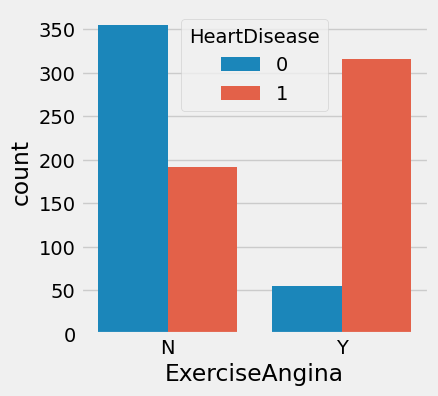

In [91]:
plt.figure(figsize=(4,4))
sns.countplot(x = 'ExerciseAngina', hue = 'HeartDisease', data = heart)
plt.show()

Patients with exercise-induced angina appear to have the highest count of heart diseases.

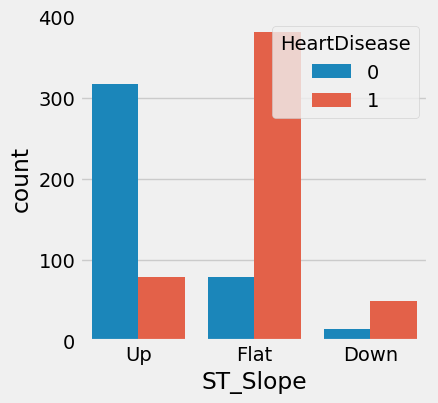

In [92]:
plt.figure(figsize=(4,4))
sns.countplot(x = 'ST_Slope', hue = 'HeartDisease', data = heart)
plt.show()

Patients with the up slope of the peak exercise ST segment are much less likely to have heart disease.

## Cleaning the Data

We will clean up the RestingBP and Cholesterol columns that have zero values.

In [93]:
heart[heart['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


Since it is only one row, we can remove it from the dataset.

In [94]:
heart_1 = heart[heart['RestingBP'] != 0].copy()
heart_1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [95]:
heart_1[heart_1['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


Since there are 171 zero values, we will replace these with the median values of Cholesterol based on the HeartDisease values.

In [96]:
# Computing the mean cholesterol levels for patients with and without heart disease,
# excluding rows with zero cholesterol values
chol_mean_0, chol_mean_1 = heart_1[heart_1['Cholesterol'] != 0].groupby('HeartDisease').mean()['Cholesterol']
chol_mean_0, chol_mean_1

(238.76923076923077, 251.06179775280899)

In [97]:
# Replacing zero values
heart_1.loc[(heart_1['Cholesterol'] == 0) & (heart_1['HeartDisease'] == 0), 'Cholesterol'] = chol_mean_0
heart_1.loc[(heart_1['Cholesterol'] == 0) & (heart_1['HeartDisease'] == 1), 'Cholesterol'] = chol_mean_1

heart_1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,245.565666,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.409819,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,250.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Feature Selection

We will convert categorical variables into dummy variables and plot the pairwise Pearson's correlations.

In [98]:
# Converting categorical features into dummy variables
heart_2 = pd.get_dummies(heart_1, drop_first=True).copy()
heart_2

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180.0,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283.0,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214.0,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195.0,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264.0,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193.0,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131.0,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236.0,0,174,0.0,1,0,1,0,0,0,0,0,1,0


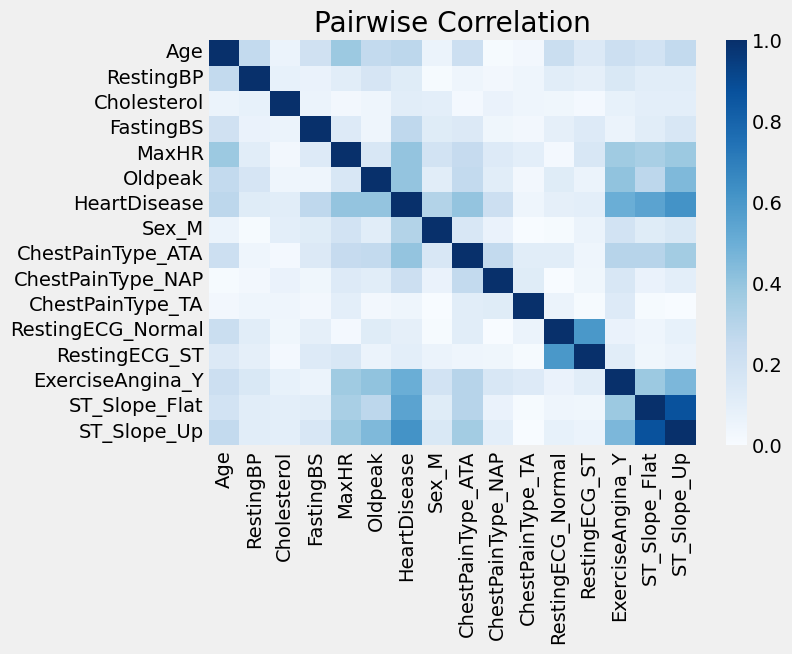

In [99]:
# Plotting the pairwise correlations' heat map
plt.figure(figsize=(7,5))

sns.heatmap(abs(round(heart_2.corr(), 2)), cmap='Blues')

plt.title('Pairwise Correlation')

plt.show()

According to heatmap ST_Slope_Up, ST_Slope_Flat, ExerciseAngina_Y and few others appear to have some correlation with the target variable.

We will sort correlations with HeartDisease in descending order next.

In [100]:
abs(heart_2.corr())['HeartDisease'].sort_values(ascending=False)

HeartDisease         1.000000
ST_Slope_Up          0.621843
ST_Slope_Flat        0.553700
ExerciseAngina_Y     0.495490
Oldpeak              0.403638
ChestPainType_ATA    0.401680
MaxHR                0.401410
Sex_M                0.305118
Age                  0.282012
FastingBS            0.267994
ChestPainType_NAP    0.215311
RestingBP            0.117990
Cholesterol          0.114495
RestingECG_ST        0.103067
RestingECG_Normal    0.092452
ChestPainType_TA     0.054591
Name: HeartDisease, dtype: float64

For our KNN classifier we will select features with correlation coefficient greater than 0.3:
- ST_Slope_Up
- ST_Slope_Flat
- ExerciseAngina_Y
- Oldpeak
- ChestPainType_ATA
- MaxHR
- Sex_M

In [101]:
heart_3 = heart_2[['ST_Slope_Up', 'ST_Slope_Flat', 'ExerciseAngina_Y',
                   'Oldpeak', 'ChestPainType_ATA', 'MaxHR', 'Sex_M', 'HeartDisease']]
heart_3

,ST_Slope_Up,ST_Slope_Flat,ExerciseAngina_Y,Oldpeak,ChestPainType_ATA,MaxHR,Sex_M,HeartDisease
0,1,0,0,0.0,1,172,1,0
1,0,1,0,1.0,0,156,0,1
2,1,0,0,0.0,1,98,1,0
3,0,1,1,1.5,0,108,0,1
4,1,0,0,0.0,0,122,1,0
...,...,...,...,...,...,...,...,...
913,0,1,0,1.2,0,132,1,1
914,0,1,0,3.4,0,141,1,1
915,0,1,1,1.2,0,115,1,1
916,0,1,0,0.0,1,174,0,1


## Fitting the KNN Classifier

First we will normalize the features and then use 10-fold cross-validation to estimate the test error.

In [102]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import \
     (cross_validate,
      KFold)

In [103]:
# Normalizing variables
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(heart_3.drop(['HeartDisease'], axis=1))

y = heart_3['HeartDisease']

In [104]:
model = KNeighborsClassifier()

# CV splitter for 10-fold cross-validation with reshuffling
kfold = KFold(n_splits=10,
           shuffle=True,
           random_state=111)

# Cross-validation
cv_results = cross_validate(model, X_scaled, y, cv=kfold)

cv_results['test_score']

array([0.77173913, 0.81521739, 0.82608696, 0.79347826, 0.7826087 ,
       0.82608696, 0.86956522, 0.84615385, 0.85714286, 0.81318681])

In [105]:
np.mean(cv_results['test_score'])

0.8201266125179169

Average test score for our KNN classifier with 7 features and 5 neighbors is 82%. We can try to improve the performance by tuning the hyperparametes.

### Hyperparameter Tuning

In [106]:
# Setting the parameters for KNN we will look through
parameters = {'n_neighbors' : [1, 25, 51, 75, 101, 125, 151],
             'weights' : ('uniform', 'distance'),
              'metric' : ('l1', 'l2'),
              'algorithm' : ('ball_tree', 'kd_tree', 'brute')}

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
# Starting the grid search
gs = GridSearchCV(model, parameters, scoring='accuracy', cv=kfold)

gs.fit(X_scaled, y)

print(gs.best_params_, gs.best_score_)

{'algorithm': 'ball_tree', 'metric': 'l2', 'n_neighbors': 25, 'weights': 'uniform'} 0.848471094123268


The best model with ball-tree algorithm, l2 distance metric, 25 neighbors, and uniform weights shows test accuracy of 84.8%.

We can use these parameters and further fine-tune the number of neighbors to use in our model.

In [109]:
parameters1 = {'n_neighbors' : range(1, 100)}

model1 = KNeighborsClassifier(algorithm='ball_tree',
                              metric='l2',
                              weights='uniform')

gs1 = GridSearchCV(model1, parameters1, scoring='accuracy', cv=kfold)

gs1.fit(X_scaled, y)

print(gs1.best_params_, gs1.best_score_)

{'n_neighbors': 27} 0.8484830387004301


The final KNN model with ball-tree algorithm, l2 distance metric, 27 neighbors, and uniform weights shows test accuracy of 84.8%.

Next we will fit a simple logistic regression model and compare the performance.

## Fitting the Logistic Regression Model

We will start with all features and use backward selection to remove coefficients with the highest p-value on each iteration until we reach the threshold of 0.05.

In [110]:
import statsmodels.api as sm

In [111]:
X = heart_2.drop(['HeartDisease'], axis=1)

X['Intercept'] = 1

logit = sm.GLM(y, X, family=sm.families.Binomial())

results = logit.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:                  917
Model:                            GLM   Df Residuals:                      901
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -302.36
Date:                Wed, 25 Oct 2023   Deviance:                       604.72
Time:                        12:44:44   Pearson chi2:                     891.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5111
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Age                   0.0192      0.013      1.458      0.145      -0.007       0.045
RestingBP             0.0018      0.006      0.295      0.768      -0.010       0.014
Cholesterol           0.0036      0.002      1.768      0.077      -0.000       0.008
FastingBS             1.3226      0.268      4.942      0.000       0.798       1.847
MaxHR                -0.0078      0.005     -1.587      0.113      -0.017       0.002
Oldpeak               0.3628      0.116      3.135      0.002       0.136       0.590
Sex_M                 1.6478      0.279      5.900      0.000       1.100       2.195
ChestPainType_ATA    -1.8961      0.324     -5.848      0.000      -2.532      -1.261
ChestPainType_NAP    -1.6148      0.260     -6.211      0.000      -2.124      -1.105
ChestPainType_TA     -1.4377      0.430     -3.340      0.001      -2.281      -0.594
RestingECG_Normal     0.0182      0.267      0.068      0.946      -0.506       0.542
RestingECG_ST         0.0043      0.343      0.013      0.990      -0.669       0.677
ExerciseAngina_Y      0.8499      0.241      3.526      0.000       0.377       1.322
ST_Slope_Flat         1.2218      0.427      2.860      0.004       0.384       2.059
ST_Slope_Up          -1.1014      0.446     -2.468      0.014      -1.976      -0.227
Intercept            -2.3849      1.493     -1.598      0.110      -5.311       0.541
=====================================================================================
"""

Dropping features with the largest p-value one by one.

In [112]:
X = X.drop(['RestingECG_ST'], axis=1)

logit = sm.GLM(y, X, family=sm.families.Binomial())

results = logit.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:                  917
Model:                            GLM   Df Residuals:                      902
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -302.36
Date:                Wed, 25 Oct 2023   Deviance:                       604.72
Time:                        12:44:44   Pearson chi2:                     890.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5111
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Age                   0.0191      0.013      1.465      0.143      -0.006       0.045
RestingBP             0.0018      0.006      0.295      0.768      -0.010       0.014
Cholesterol           0.0036      0.002      1.771      0.077      -0.000       0.008
FastingBS             1.3230      0.266      4.969      0.000       0.801       1.845
MaxHR                -0.0078      0.005     -1.632      0.103      -0.017       0.002
Oldpeak               0.3628      0.116      3.137      0.002       0.136       0.589
Sex_M                 1.6481      0.278      5.921      0.000       1.103       2.194
ChestPainType_ATA    -1.8960      0.324     -5.851      0.000      -2.531      -1.261
ChestPainType_NAP    -1.6148      0.260     -6.211      0.000      -2.124      -1.105
ChestPainType_TA     -1.4378      0.430     -3.343      0.001      -2.281      -0.595
RestingECG_Normal     0.0163      0.220      0.074      0.941      -0.415       0.447
ExerciseAngina_Y      0.8501      0.240      3.537      0.000       0.379       1.321
ST_Slope_Flat         1.2217      0.427      2.860      0.004       0.385       2.059
ST_Slope_Up          -1.1013      0.446     -2.468      0.014      -1.976      -0.227
Intercept            -2.3805      1.451     -1.641      0.101      -5.225       0.464
=====================================================================================
"""

In [113]:
X = X.drop(['RestingECG_Normal'], axis=1)

logit = sm.GLM(y, X, family=sm.families.Binomial())

results = logit.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:                  917
Model:                            GLM   Df Residuals:                      903
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -302.36
Date:                Wed, 25 Oct 2023   Deviance:                       604.72
Time:                        12:44:44   Pearson chi2:                     889.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5111
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Age                   0.0189      0.013      1.486      0.137      -0.006       0.044
RestingBP             0.0018      0.006      0.293      0.769      -0.010       0.014
Cholesterol           0.0036      0.002      1.770      0.077      -0.000       0.008
FastingBS             1.3231      0.266      4.968      0.000       0.801       1.845
MaxHR                -0.0078      0.005     -1.636      0.102      -0.017       0.002
Oldpeak               0.3625      0.116      3.136      0.002       0.136       0.589
Sex_M                 1.6473      0.278      5.924      0.000       1.102       2.192
ChestPainType_ATA    -1.8949      0.324     -5.853      0.000      -2.529      -1.260
ChestPainType_NAP    -1.6144      0.260     -6.211      0.000      -2.124      -1.105
ChestPainType_TA     -1.4392      0.430     -3.348      0.001      -2.282      -0.597
ExerciseAngina_Y      0.8504      0.240      3.538      0.000       0.379       1.322
ST_Slope_Flat         1.2229      0.427      2.865      0.004       0.386       2.059
ST_Slope_Up          -1.1003      0.446     -2.467      0.014      -1.974      -0.226
Intercept            -2.3542      1.406     -1.674      0.094      -5.111       0.402
=====================================================================================
"""

In [114]:
X = X.drop(['RestingBP'], axis=1)

logit = sm.GLM(y, X, family=sm.families.Binomial())

results = logit.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:                  917
Model:                            GLM   Df Residuals:                      904
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -302.41
Date:                Wed, 25 Oct 2023   Deviance:                       604.81
Time:                        12:44:44   Pearson chi2:                     894.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5111
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Age                   0.0197      0.012      1.588      0.112      -0.005       0.044
Cholesterol           0.0036      0.002      1.793      0.073      -0.000       0.008
FastingBS             1.3221      0.266      4.969      0.000       0.801       1.844
MaxHR                -0.0078      0.005     -1.636      0.102      -0.017       0.002
Oldpeak               0.3653      0.115      3.174      0.002       0.140       0.591
Sex_M                 1.6447      0.278      5.924      0.000       1.101       2.189
ChestPainType_ATA    -1.8887      0.323     -5.849      0.000      -2.522      -1.256
ChestPainType_NAP    -1.6126      0.260     -6.205      0.000      -2.122      -1.103
ChestPainType_TA     -1.4276      0.428     -3.336      0.001      -2.266      -0.589
ExerciseAngina_Y      0.8584      0.239      3.594      0.000       0.390       1.327
ST_Slope_Flat         1.2342      0.425      2.901      0.004       0.400       2.068
ST_Slope_Up          -1.0875      0.444     -2.448      0.014      -1.958      -0.217
Intercept            -2.1883      1.288     -1.699      0.089      -4.712       0.336
=====================================================================================
"""

In [115]:
X = X.drop(['Age'], axis=1)

logit = sm.GLM(y, X, family=sm.families.Binomial())

results = logit.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:                  917
Model:                            GLM   Df Residuals:                      905
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -303.67
Date:                Wed, 25 Oct 2023   Deviance:                       607.34
Time:                        12:44:44   Pearson chi2:                     916.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5097
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Cholesterol           0.0036      0.002      1.787      0.074      -0.000       0.008
FastingBS             1.3661      0.264      5.166      0.000       0.848       1.884
MaxHR                -0.0103      0.004     -2.287      0.022      -0.019      -0.001
Oldpeak               0.3971      0.114      3.495      0.000       0.174       0.620
Sex_M                 1.6145      0.276      5.840      0.000       1.073       2.156
ChestPainType_ATA    -1.8978      0.322     -5.892      0.000      -2.529      -1.266
ChestPainType_NAP    -1.5854      0.258     -6.145      0.000      -2.091      -1.080
ChestPainType_TA     -1.3738      0.423     -3.249      0.001      -2.203      -0.545
ExerciseAngina_Y      0.8730      0.238      3.662      0.000       0.406       1.340
ST_Slope_Flat         1.2154      0.425      2.858      0.004       0.382       2.049
ST_Slope_Up          -1.0957      0.444     -2.469      0.014      -1.965      -0.226
Intercept            -0.7968      0.938     -0.849      0.396      -2.636       1.042
=====================================================================================
"""

In [116]:
X = X.drop(['Cholesterol'], axis=1)

logit = sm.GLM(y, X, family=sm.families.Binomial())

results = logit.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:                  917
Model:                            GLM   Df Residuals:                      906
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -305.31
Date:                Wed, 25 Oct 2023   Deviance:                       610.61
Time:                        12:44:44   Pearson chi2:                     917.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5080
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
FastingBS             1.3877      0.263      5.278      0.000       0.872       1.903
MaxHR                -0.0099      0.004     -2.230      0.026      -0.019      -0.001
Oldpeak               0.3928      0.113      3.463      0.001       0.171       0.615
Sex_M                 1.5477      0.273      5.676      0.000       1.013       2.082
ChestPainType_ATA    -1.9104      0.321     -5.944      0.000      -2.540      -1.281
ChestPainType_NAP    -1.6168      0.256     -6.304      0.000      -2.119      -1.114
ChestPainType_TA     -1.4029      0.419     -3.346      0.001      -2.225      -0.581
ExerciseAngina_Y      0.8918      0.238      3.752      0.000       0.426       1.358
ST_Slope_Flat         1.2588      0.423      2.977      0.003       0.430       2.088
ST_Slope_Up          -1.0880      0.442     -2.464      0.014      -1.953      -0.223
Intercept             0.0835      0.796      0.105      0.916      -1.476       1.643
=====================================================================================
"""

All coefficients now have p-values less than 0.05, implying that these variables are likely to affect the response. Next we will check for multicollinearuty.

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

vals = [VIF(X, i) for i in range(X.shape[1])] 

pd.DataFrame({'vif':vals},
                   index=X.columns)

,vif
FastingBS,1.059440
MaxHR,1.320837
Oldpeak,1.466284
Sex_M,1.077413
ChestPainType_ATA,1.476050
ChestPainType_NAP,1.258385
ChestPainType_TA,1.110090
ExerciseAngina_Y,1.562051
ST_Slope_Flat,4.447817
ST_Slope_Up,5.439454


The VIF show no substantial correlation among predictors, except for ST_Slope_Flat and ST_Slope_Up, but given that these dummy variables were created from single categorical variable, it should not pose significant problems.

Next we will fit logistic regression model using sklearn which enables us to cross-validate it and assess the logit's test accuracy.

In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:
model = LogisticRegression(C=1e10, solver='liblinear')

# Cross-validating
cv_results_logit = cross_validate(model, X, y, cv=kfold)

np.mean(cv_results_logit['test_score'])

0.8571667462971811

The accuracy of logistic regression (85.7%) is slightly better than KNN's (84.8%).

## Interpreting the Logit Coefficients

We can estimate the effects of each predictor on the response in logit model.

In [120]:
model.fit(X, y)

features = pd.DataFrame(model.feature_names_in_, columns=['Feature'])

coef = pd.DataFrame(model.coef_[0], columns=['Coef'])

df = pd.concat([features, coef], axis=1)

df

,Feature,Coef
0,FastingBS,1.387371
1,MaxHR,-0.009949
2,Oldpeak,0.392581
3,Sex_M,1.547570
4,ChestPainType_ATA,-1.911172
5,ChestPainType_NAP,-1.617547
6,ChestPainType_TA,-1.402691
7,ExerciseAngina_Y,0.891905
8,ST_Slope_Flat,1.257808
9,ST_Slope_Up,-1.089255


Now we can calculate the odds ratio for each predictor.

In [121]:
df['Coef_exp'] = round(np.exp(df['Coef']), 2)

df

,Feature,Coef,Coef_exp
0,FastingBS,1.387371,4.00
1,MaxHR,-0.009949,0.99
2,Oldpeak,0.392581,1.48
3,Sex_M,1.547570,4.70
4,ChestPainType_ATA,-1.911172,0.15
5,ChestPainType_NAP,-1.617547,0.20
6,ChestPainType_TA,-1.402691,0.25
7,ExerciseAngina_Y,0.891905,2.44
8,ST_Slope_Flat,1.257808,3.52
9,ST_Slope_Up,-1.089255,0.34


With lower odds of having a heart disease are associated, holding other variables constant:
- Higher maximum heart rate
- Having any chest pain type other than Asymptomatic

With higher odds of having a heart disease are associated, holding other variables constant:
- Higher fasting blood sugar
- Higher ST depression (Oldpeak)
- Being a male (odds are 4.7 times (!) higher for males)
- Having exercise-induced angina

Compared to having a Down slope of the peak exercise ST segment, patients with Up slope have lower odds of having a heart disease, while patients with Flat slope have 3.5-fold higher odds.

# Conclusion

This analysis set out to develop two machine learning models for predicting heart disease risk using clinical data. The KNN classifier and linear regression model were selected as the base predictive modeling approaches. After data preprocessing and feature selection, both models was trained and optimized using techniques like hyperparameter tuning (for KNN) and cross-validation.

The final KNN model demonstrated promising performance with 85% test accuracy. Key predictors included sex, chest pain type, exercise ECG results, and other clinical inputs. The fitted logistic regression model also showed comparable performance, achieving 86% test accuracy. This level of predictive accuracy indicates machine learning has potential for early identification of patients at high risk of cardiovascular disease.

While more refinement is needed, this project established a baseline KNN and linear regression models using real-world clinical data. With further validation on additional datasets, these models could eventually serve as a useful tool for physicians to assess heart disease risk. The next steps would involve expanding the feature set and trialing other classifiers to improve generalizability. Overall, the results support the feasibility of an ML approach for heart disease prediction based on standard inputs.